In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models

print(tf.__version__)

2.6.0


In [2]:
sst = np.load("../data/htmp_data/98sst.npy")
ssh = np.load("../data/htmp_data/98ssh.npy")
sst = sst / 0.6260731
ssh = ssh / 0.033900216

In [3]:
model = keras.models.load_model("../data/model/exp1_pretrain_op1_2")

In [4]:
ip_data = np.concatenate([sst, ssh])[np.newaxis, ...]
ip_data = np.transpose(ip_data, axes=[0, 2, 3, 1])
ip_data.shape

(1, 24, 72, 6)

In [5]:
model.predict(ip_data)

array([[0.380133]], dtype=float32)

In [6]:
np.load("../data/htmp_data/98nino34.npy")

array([2.327188 , 2.2048888, 1.977981 ], dtype=float32)

In [7]:
sst_var, ssh_var, nino34_var = ld.load_var("../data/var_data", op_len=13, out_put_one=True)
sst_std = 0.6260731
ssh_std = 0.033900216
nino34_std = 0.9931435
sst_var, ssh_var, nino34_var = sst_var / sst_std, ssh_var / ssh_std, nino34_var / nino34_std

var_data data_shape: (479, 24, 72) (479, 24, 72) (479,)


In [9]:
ip_var = np.concatenate([sst_var, ssh_var], axis=3)

In [10]:
predict_nino = model.predict(ip_var)

In [11]:
import pandas as np
predict_nino.shape

(464, 1)

In [12]:
predict_nino[11::12]

array([[ 0.07646356],
       [ 0.64364564],
       [-0.51323557],
       [-0.891615  ],
       [-0.44361624],
       [ 0.28730294],
       [-0.40700075],
       [-1.3760775 ],
       [-0.6529912 ],
       [ 0.20628618],
       [ 0.0454229 ],
       [-0.27569178],
       [-0.41884616],
       [-0.28839687],
       [-0.6774699 ],
       [ 0.02737162],
       [ 0.12004123],
       [-1.2517132 ],
       [-0.74751157],
       [-0.5689069 ],
       [ 0.19270208],
       [-0.08245579],
       [-0.67465866],
       [-0.2875228 ],
       [-0.06447446],
       [-0.22036734],
       [-0.65891945],
       [-0.38396755],
       [ 0.09149663],
       [-0.5515035 ],
       [-0.08752169],
       [-0.2933319 ],
       [-0.04054973],
       [ 0.26030758],
       [ 0.21342477],
       [-0.8148829 ],
       [ 0.11523641],
       [ 0.47024557]], dtype=float32)

In [13]:
djf_diff = nino34_var[11::12] - predict_nino[11::12,0]

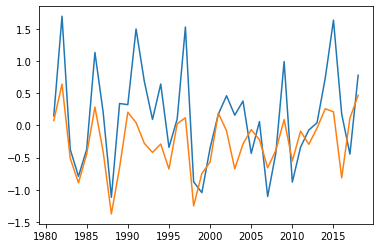

In [14]:
import numpy as np
time = np.arange(1981,2019)
plt.plot(time,nino34_var[11::12])
plt.plot(time,predict_nino[11::12,0])

In [16]:
time[7],nino34_var[11::12][7],predict_nino[11::12,0][7]

(1988, -1.1175148, -1.3760775)

In [21]:
# np.save(ip_var[])
np.save("../data/1988_lanina_ip",ip_var[11::12][[7]])
ip_var[11::12][[7]].shape

(1, 24, 72, 6)

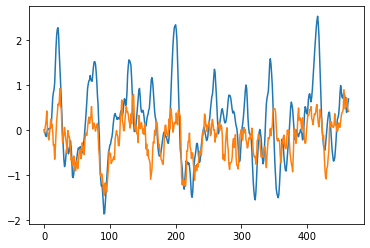

In [18]:
plt.plot(nino34_var)
plt.plot(predict_nino)